# Acquiring Some Data

## Ask a question!

## _Notes_
I want a small data set that I can use to demonstrate techniques on...  I want both numerical and non-numerical fields.  Maybe a data set that has height, weight and gender might be interesting.

## Find data set/s related to that question
There are a lot of open data sets out there that you can access. Some places that you can find data sets are listed below, but there are plenty of data sets out there.

1. Kaggle - Lots of interesting data sets  https://www.kaggle.com/datasets
1. UC Irvine Machine Learning Repo - A venerable source of data.  Some what dated now.  http://mlr.cs.umass.edu/ml/
1. US government.  The open data sets from the US government. https://catalog.data.gov/dataset (_Many organinizations/governments make data sets available. I have given three, but check around for others._) 
1. UK data sets https://www.ukdataservice.ac.uk
1. IMF data setshttps://www.imf.org/en/Data
1. Amazon AWS data sets - Data sets that can be aquired through AWS services https://registry.opendata.aws
1. Wikipedia list of data sets - https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research
1. 538 - Politics and sports opinions https://fivethirtyeight.com
1. Awesome data - a collection of data sets on github https://github.com/awesomedata/awesome-public-datasets

One final option is to scrape data from existing web sites and build your own data set.

## Acquire the data
You may want to create a work space and then download the data set into the workspace so you have a local copy to work with.  If you are working with a very large data set, you may choose to only download a part of the set.

Normally, we would use python packages for urls, os and tarfiles to download the data, but Kaggle will only allow access via their own web facing API. 

We will need an account, but it's free!

We click the download button and acquire the data set. It has the name weight-height.csv and is a comma separated value file with one record per line.

We will never make changes in this data file.  We may decide to ignore some of the data, but we will make that part of the preprocessing of data that we do before applying our model.  If you are particularly paranoid, you might want to create a copy of the CSV file.

## _Notes: The source of the data is:_
The previous data set we tried looked suspicious.  I strongly suspect that the data was generated instead of recorded.  I am going to look in Kaggle again to see if there is another data set with height, weight and age.

https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

This one has an extra field, but I can ignore that.

## Look at the forrest of the data
At this point we want to look at the overall picture of the data.  We are not yet trying to do a detailed analysis, but there are some basic questions we want to answer about our data set.

1. In each record of data what are the features?
2. What are the range of values (min, median/average, max)
3. Do I have values that are not numeric?
4. Do I have records that are missing features?


Now that we have a CSV file to work with, lets use pandas to examine the data.

The first thing we will do is to pull all the data from the CSV file into a pandas dataframe and then look at the keys and the first five lines using the head() function.

In [1]:
import pandas as pd

data_frame = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
print(data_frame.keys())
data_frame.head()

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


## _Notes_ 
Our data has four dimensions (pieces of data in each record).

What to notice.  We have mixed male and female.  The height and weight are granular.  I am not sure about the units for the height and weight...

Looking better so far.

## Quick Overview
Lets get a quick overview of the data using the info() function.

In [2]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.7+ KB


## _Notes_
We see that we have 500 entries. (This is a very small dataset.)  Gender is an object of some kind.  Height, Weight, and Index are integer values.  We don't have any missing data values.



## Look at the object fields
We can pull out information about the Gender field using the value_counts() method

In [3]:
data_frame["Gender"].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

## _Notes_
We have two values, Male and Female. Notice though that there are unequal numbers of men and women.  We will want to use a stratified sample when we create our training set.

## Look at the numerical fields
We can look at numerical fields using the describe() function. We get some basic information.

In [4]:
data_frame.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


## _Notes_
Nothing new here.

## Get Distributions
To really understand what is going on in the data, we will need to see a distribution. One of the common ways of doing this is to use a histogram. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134acfd0>,
      dtype=object)

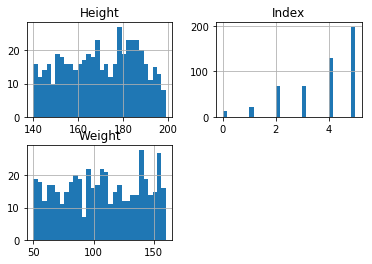

In [5]:
import matplotlib.pyplot as plt

data_frame.hist(bins=30)

Neither Height or Weight looks like it is normally distributed.  We have large number of values that are in the high and low range for both Height and Weight.  This is very suspicious.  

## Visualize the data
Lets make a copy of the data set and do some simple graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113814a58>,
      dtype=object)

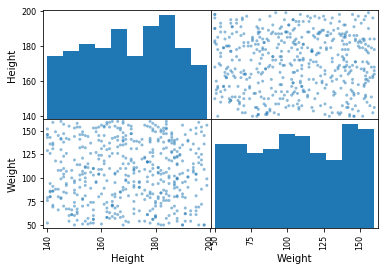

In [6]:
working_set = data_frame.copy()

# we do scatter plots first
from pandas.plotting import scatter_matrix

compare = ["Height", "Weight", "Gender"]
scatter_matrix(working_set[compare])

## _Notes_
Ok, this is a problem.  The scatter plot of the weight vs. the height is basically uncorellated.  

## Do a Correlation
Check the numerical parameters and see if any are strongly correlated.  This can give an idea of dimensions that are predictive of each other. 

In [8]:
corr = data_frame.corr()
print(corr)

          Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000


## _Notes_
It is hard to get less correlated than 0.000446.  Time to look for new data.  See the next note book!

## Do a better scatter plot
Look to see if there are interesting relations to the non-numeric data.  Try some filtering.